# How To: Convert EMIT .nc to .envi

---

The `reformat.py` script available in the [emit-sds/emit-utils](https://github.com/emit-sds/emit-utils) repository can be used to convert EMIT netCDF files (as delivered to the LP DAAC) to ENVI files. This script also can apply the included GLT to orthorectify the image if desired.

This jupyter notebook utilizes the EMIT-utils repository to provide users with programmatic routes to accomplish their EMIT reformatting workflows.

**Requirements:**
+ A NASA [Earthdata Login](https://urs.earthdata.nasa.gov/) account is required to download EMIT data   
+ Selected the `emit_tutorials` environment as the kernel for this notebook.
  + For instructions on setting up the environment, follow the the `setup_instructions.md` included in the `/setup/` folder of the repository.  
+ Downloaded the necessary EMIT files to the `../data/` folder.
  + Instructions and a list of files can be found in the `setup_instructions.md` included in the `/setup/` folder of the repository.

---

## Clone and Install emit-utils

Clone the [emit-utils](https://github.com/emit-sds/emit-utils) repository.

In [1]:
!git clone https://github.com/emit-sds/emit-utils.git ../emit_utils/

fatal: destination path '../emit_utils' already exists and is not an empty directory.


This will copy the `emit-utils` repository to a folder within this repository. 

After you have copied it, use `pip` package manager to install the directory as a package to ensure you have all of the dependencies and be used in the command line.

In [2]:
!pip install --editable ../emit_utils

Obtaining file:///Users/rachdi18/Documents/codes/emit-main/emit_utils
  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)
  Attempting uninstall: emit-utils
    Found existing installation: emit-utils 1.2.3
    Uninstalling emit-utils-1.2.3:
      Successfully uninstalled emit-utils-1.2.3
  Running setup.py develop for emit-utils


After successfully installing `emit-utils`, you can use the scripts contained within as part of your workflows. 

---

## Executing the Reformat Script

Before calling the `reformat.py` script, create an output directory for the `.envi` files that will be produced.

In [3]:
import os
outpath = '/Users/rachdi18/Documents/Namibia_Epembe/' 
if not os.path.exists(outpath):
    os.makedirs(outpath)

In [4]:
import netCDF4
import matplotlib.pyplot as plt

In [5]:
file_path = '/Users/rachdi18/Downloads/EMIT_L2A_RFL_001_20230107T082439_2300705_008.nc'

In [6]:
nc = netCDF4.Dataset(file_path, mode="r")
print(nc)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    ncei_template_version: NCEI_NetCDF_Swath_Template_v2.0
    summary: The Earth Surface Mineral Dust Source Investigation (EMIT) is an Earth Ventures-Instrument (EVI-4) Mission that maps the surface mineralogy of arid dust source regions via imaging spectroscopy in the visible and short-wave infrared (VSWIR). Installed on the International Space Station (ISS), the EMIT instrument is a Dyson imaging spectrometer that uses contiguous spectroscopic measurements from 410 to 2450 nm to resolve absoprtion features of iron oxides, clays, sulfates, carbonates, and other dust-forming minerals. During its one-year mission, EMIT will observe the sunlit Earth's dust source regions that occur within +/-52° latitude and produce maps of the source regions that can be used to improve forecasts of the role of mineral dust in the radiative forcing (warming or cooling) of the atmosphere.\n\nThis file contains L2A esti

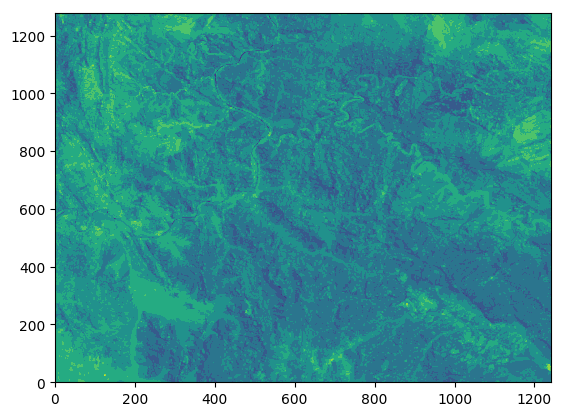

In [7]:
plt.contourf(nc['reflectance'][:,:,50])

Now, execute the `reformat.py` script contained in the emit-utils repository. When executing this script, provide the path to the `.nc` file, followed by the directory to place the `.envi` files in. If you wish to apply the GLT or orthorectify, include `--orthorectify` as an argument.

In [8]:
!python /Users/rachdi18/Documents/codes/emit-main/emit-utils/emit_utils/reformat.py /Users/rachdi18/Downloads/EMIT_L2A_RFL_001_20230107T082439_2300705_008.nc /Users/rachdi18/Documents/Namibia_Epembe/ --orthorectify

This will orthorectify the image, create an ENVI header, and save it in `.envi` format inside the `../data/envi` folder.